In [87]:
from astropy.io import fits
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from astropy.wcs import WCS

from PIL import Image

%config InlineBackend.rc = {}
%matplotlib inline

In [2]:
data_path = './data/PESSTO/'

# Catalogues
photometry_path = data_path + 'Multi-epoch Photometry Catalogue/'
transient_path = data_path + 'Transient Catalogue/'

# Data
imaging_path = data_path + 'Imaging Data/'
spectral_path = data_path + 'Spectral Data/'

# Imaging Data Exploration

In [208]:
# try LSQ14asn
# don't NGC772
transient_pttrn = 'NGC7552'
transient_pttrn += '*[!weight.*].fits'

In [209]:
files_list = glob.glob1(imaging_path, transient_pttrn)

In [210]:
images_list = []
radec_list = []
coordinates_list = []
nt_coordinates_list = []
dates_list = []
for filename in files_list:
    hdu_list = fits.open(imaging_path + filename)
    # Date
    date = filename.split('_')[1:4]
    dates_list.append(date)
    # Coordinates
    X = hdu_list[0].header['CRPIX1']
    Y = hdu_list[0].header['CRPIX1']
    coordinates_list.append((X,Y))
    # NT Coordinates
    NTX = hdu_list[0].header['NTCRPIX1']
    NTY = hdu_list[0].header['NTCRPIX2']
    nt_coordinates_list.append((NTX, NTY))
    # RaDec
    ra = hdu_list[0].header['CRVAL1']
    dec = hdu_list[0].header['CRVAL2']
    radec_list.append((ra, dec))
    # Image
    image_data = hdu_list[0].data
    images_list.append(image_data)
    hdu_list.close()

### Original Images

RaDec (349.035270362, -42.5895929103)
RaDec (349.035270362, -42.5895929103)
RaDec (349.037826055, -42.5872721848)
RaDec (349.037826055, -42.5872721848)
RaDec (349.031268224, -42.5864607789)


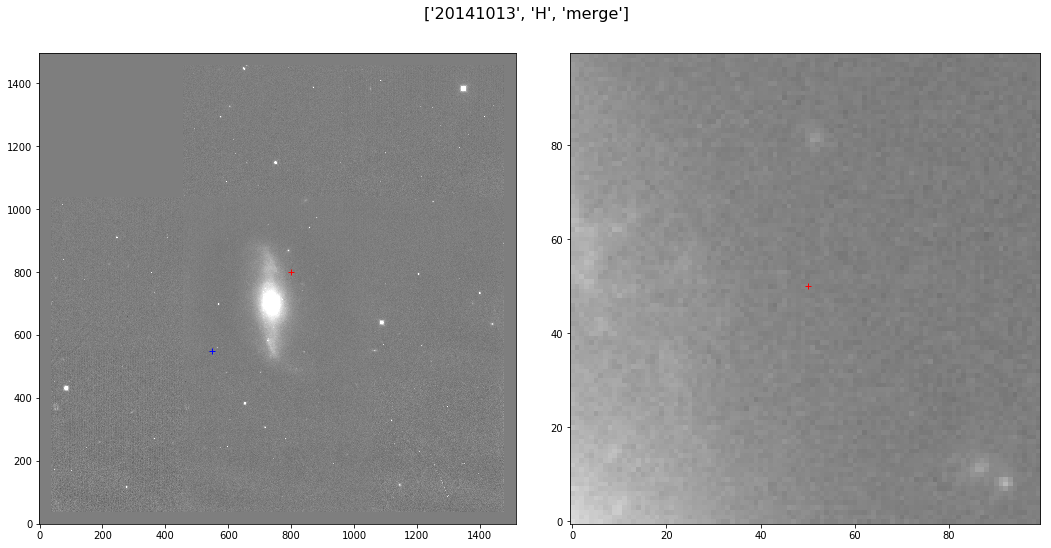

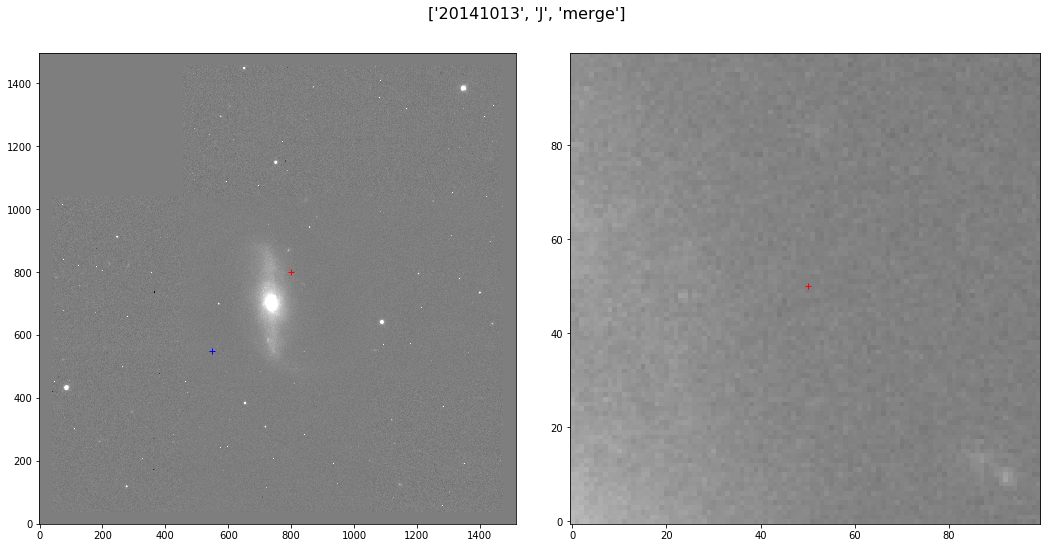

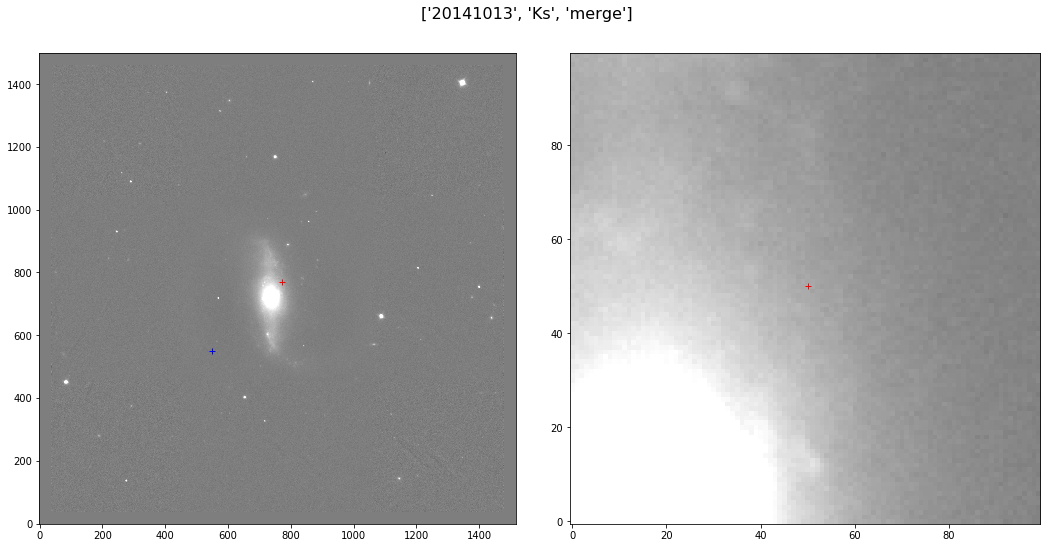

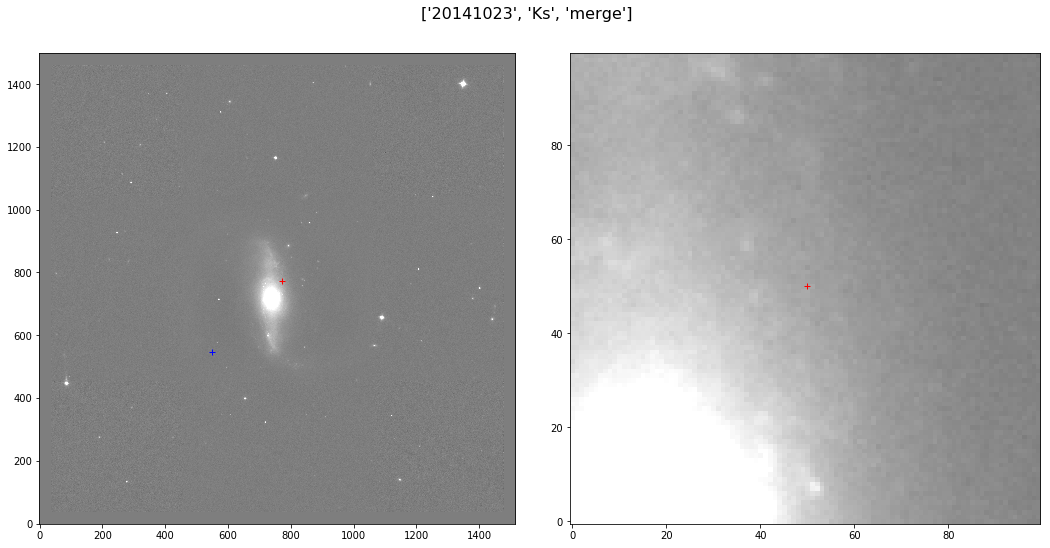

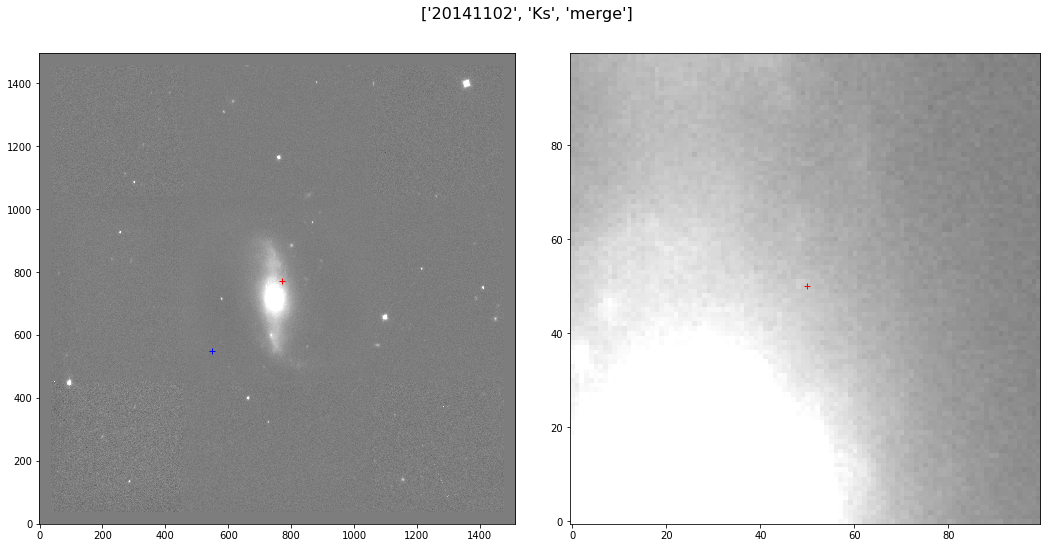

In [211]:
for i, image_data in enumerate(images_list[:10]):
    date = dates_list[i]
    X, Y = coordinates_list[i]
    NTX, NTY = nt_coordinates_list[i]
    ra, dec = radec_list[i]
    # Converted Image
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(date, fontsize=16)
    ax1 = plt.subplot('221')
    minpx = np.mean(image_data)-2*np.std(image_data) 
    maxpx = np.mean(image_data)+2*np.std(image_data)
    ax1.imshow(image_data, origin='lower', cmap='gray', vmin=minpx, vmax=maxpx)
    ax1.plot([X],[Y], 'r+')
    ax1.plot([NTX],[NTY], 'b+')
    # Cropped Image
    side = 100
    s = side / 2
    img = Image.fromarray(image_data).crop( (X-s,Y-s, X+s, Y+s))
    crop = np.copy(np.asarray(img))
    ax2 = plt.subplot('222')
    ax2.imshow(crop, origin='lower', cmap='gray', vmin=minpx, vmax=maxpx)
    ax2.plot([s],[s], 'r+')
#    print('X:', X, '', 'Y:', Y)
    print('RaDec', (ra, dec))
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])